# **1. INTRODUCTION**

**1.1 Identity**
- Nama : Daniel
- Batch : HCK-001


**1.2 Dataset Explanation**
- The dataset consists of information histtory from rideshare Uber & Lyft in Boston, MA.


**1.3 Objective**
- Make machine learning model with skicit-learn library.
- Predict the price using the model.
- Make evaluation of the model.
- Predict the price from data inference.

**1.4 Notebook Disclaimer**
- I will write code first, then later comes the explanation to descrive what I do or try to do in the code above it.

# **2. IMPORT LIBRARY**

In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# **3. DATA LOADING**

In [253]:
df = pd.read_csv("/Users/daniel/Desktop/Hacktiv_8/Assignment/Phase_1/data/rideshare_kaggle.csv")
df.T

,0,1,2,3,4,5,6,7,8,9,...,693061,693062,693063,693064,693065,693066,693067,693068,693069,693070
id,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,4bd23055-6827-41c6-b23b-3c491f24e74d,981a3613-77af-4620-a42a-0c0866077d1e,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,462816a3-820d-408b-8549-0b39e82f65ac,474d6376-bc59-4ec9-bf57-4e6d6faeb165,4f9fee41-fde3-4767-bbf1-a00e108701fb,8612d909-98b8-4454-a093-30bd48de0cb3,...,54362c72-124b-47e8-8d07-62a07cfff624,64a50889-d05b-49de-b416-1802db5c27ac,6c1d9207-a9af-431e-a65f-3d9d205f28bf,25ed29df-4f9c-4aac-8218-681427f1d738,353e6566-b272-479e-a9c6-98bd6cb23f25,616d3611-1820-450a-9845-a9ff304a4842,633a3fc3-1f86-4b9e-9d48-2b7132112341,64d451d0-639f-47a4-9b7c-6fd92fbd264f,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda
timestamp,1544952607.89,1543284023.677,1543366822.198,1543553582.749,1543463360.223,1545071112.138,1543208580.2,1543780384.677,1543818482.645,1543315522.249,...,1543728484.0,1543728484.0,1543728484.0,1543728484.0,1543708386.0,1543708386.0,1543708386.0,1543708386.0,1543708386.0,1543708386.0
hour,9,2,1,4,3,18,5,19,6,10,...,5,5,5,5,23,23,23,23,23,23
day,16,27,28,30,29,17,26,2,3,27,...,2,2,2,2,1,1,1,1,1,1
month,12,11,11,11,11,12,11,12,12,11,...,12,12,12,12,12,12,12,12,12,12
datetime,2018-12-16 09:30:07,2018-11-27 02:00:23,2018-11-28 01:00:22,2018-11-30 04:53:02,2018-11-29 03:49:20,2018-12-17 18:25:12,2018-11-26 05:03:00,2018-12-02 19:53:04,2018-12-03 06:28:02,2018-11-27 10:45:22,...,2018-12-02 05:28:04,2018-12-02 05:28:04,2018-12-02 05:28:04,2018-12-02 05:28:04,2018-12-01 23:53:05,2018-12-01 23:53:05,2018-12-01 23:53:05,2018-12-01 23:53:05,2018-12-01 23:53:05,2018-12-01 23:53:05
timezone,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,...,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York
source,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Back Bay,Back Bay,Back Bay,Back Bay,...,Theatre District,Theatre District,Theatre District,West End,West End,West End,West End,West End,West End,West End
destination,North Station,North Station,North Station,North Station,North Station,North Station,Northeastern University,Northeastern University,Northeastern University,Northeastern University,...,Haymarket Square,Haymarket Square,Haymarket Square,North End,North End,North End,North End,North End,North End,North End
cab_type,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,...,Uber,Uber,Uber,Uber,Uber,Uber,Uber,Uber,Uber,Uber


**3.1 Total columns and rows**

- There are originally 57 columns and 693071 rows in our dataset.

In [254]:
#Assign random seed so the data inference won't change
np.random.seed(15)

#Generate data inference
data_inf =  df.sample(1)
data_inf.isnull().sum(axis=1)

254160    0
dtype: int64

**3.2 Getting Data Inference**
- We take one row with sample function as data inference from our dataset for later tested with our model.
- Ensuring that there is no missing value in the data inference.

In [255]:
data_inf

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
254160,0b1b6501-0abb-4132-b38a-82ffd2959885,1.543527e+09,21,29,11,2018-11-29 21:28:00,America/New_York,Beacon Hill,Haymarket Square,Lyft,...,0.0,1543510800,35.12,1543550400,44.76,1543510800,30.85,1543550400,38.44,1543510800


**3.3 Data Inference Preview**
- The data inference is taken from data index 254160.

In [256]:
df.drop(index=data_inf.index, inplace=True)

**3.4 Dropping Data Inference from Original Dataset**
- Deleting the inference data from the original dataset, so later the model will predict the brand new data and so there is no duplicated data either.

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693070 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693070 non-null  object 
 1   timestamp                    693070 non-null  float64
 2   hour                         693070 non-null  int64  
 3   day                          693070 non-null  int64  
 4   month                        693070 non-null  int64  
 5   datetime                     693070 non-null  object 
 6   timezone                     693070 non-null  object 
 7   source                       693070 non-null  object 
 8   destination                  693070 non-null  object 
 9   cab_type                     693070 non-null  object 
 10  product_id                   693070 non-null  object 
 11  name                         693070 non-null  object 
 12  price                        637975 non-null  float64
 13 

**3.5 Looking insight from info method**
- There is one column with missing value, that is in 'price' column.
- We have 29 columns with float data, 17 columns with int64, and 11 columns with object data in total.

In [258]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

**3.6 Getting column names**
- Here we can grab all the column names as shown above.

In [259]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

**3.7 Counting missing value**
- There are 55095 missing value in the 'price' column, around 7.9% of total dataset.

In [260]:
df.dropna(inplace=True)

**3.8 Dropping missing value**
- We drop the missing value since the price column will be our target/label.
- Suppose it's not the target, because the total amount is around 7.9% we can drop it and won't affect the data as well.

In [261]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

**3.9 Re-checking missimg value**
- There is no missing value anymore in our dataset.

# **4. Exploratory Data Analysis (EDA)**

Total unique variabel in hour columns is : 24
Total unique variabel in day columns is : 17
Total unique variabel in month columns is : 2


<AxesSubplot:xlabel='month', ylabel='count'>

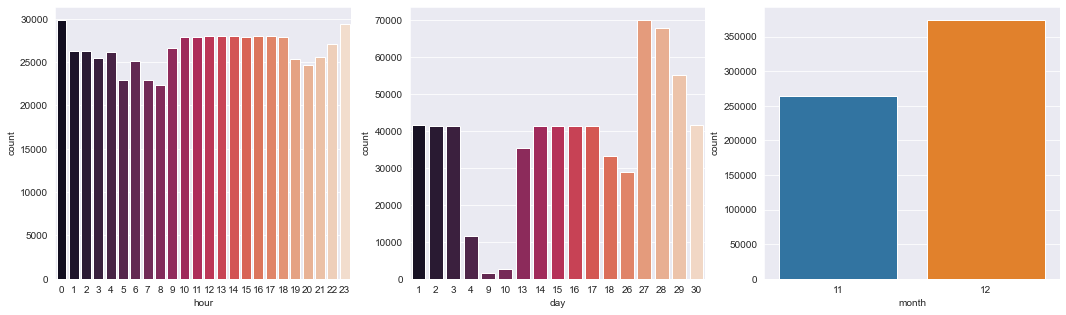

In [262]:
#Set style to darkgrid
sns.set_style('darkgrid')

#Counting how many unique variabel in 'hour' column
print("Total unique variabel in hour columns is :", df['hour'].nunique())
print("Total unique variabel in day columns is :", df['day'].nunique())
print("Total unique variabel in month columns is :", df['month'].nunique())

#Counting the distribution of value in 'hour' column
fig, ax = plt.subplots(1,3, figsize=(18, 5))
sns.countplot(data=df, x='hour', ax=ax[0], palette='rocket')
sns.countplot(data=df, x='day', ax=ax[1], palette='rocket')
sns.countplot(data=df, x='month', ax=ax[2])

**4.1 Analisyng total value in column 'hour', 'day' & 'month'**

From the code and visulization above we know that :
- There are 24 unique values/variables in 'hour' column which show time of a day, and all of them are distributed evenly.
- There are 17 unique values/variables in 'day' which each of them indicates date of a month. 
There is no record for date 5th, 6th, 7th, 8th, 11th, 12th, 19th, 20th, 21st, 22nd, ,23rd, 24th, 25th, 31st. The data for the date 4th, 9th and 10th are lower than other dates.
- There are only two data record in column 'month', they are only November (11) and December (12). Total data are not really different, even November data is a bit lower.

<AxesSubplot:xlabel='month', ylabel='counts'>

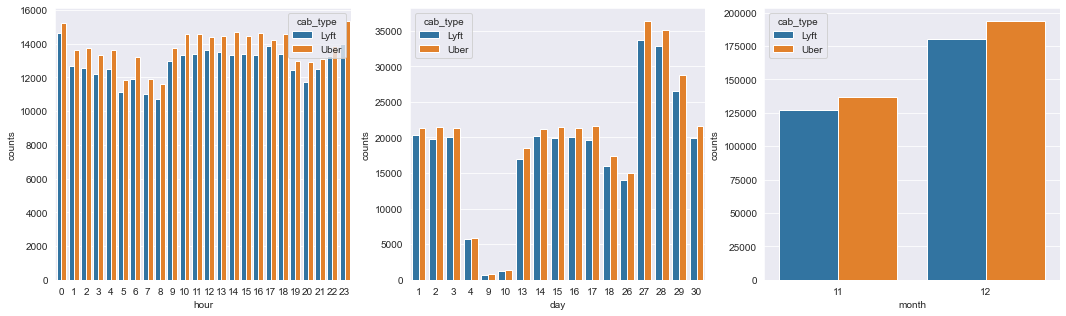

In [263]:
fig, ax = plt.subplots(1,3, figsize=(18, 5))

#Grouping by hour, day, month respectively for visualizing the cab type by the group
df_group_by_hour_type = df.groupby(by=['hour', 'cab_type']).size().reset_index(name="counts")
df_group_by_day_type = df.groupby(by=['day', 'cab_type']).size().reset_index(name="counts")
df_group_by_month_type = df.groupby(by=['month', 'cab_type']).size().reset_index(name="counts")

#Visualizing the cab type by hour, day and month
sns.barplot(data=df_group_by_hour_type, x='hour', y='counts', hue='cab_type', ax=ax[0])
sns.barplot(data=df_group_by_day_type, x='day', y='counts', hue='cab_type', ax=ax[1])
sns.barplot(data=df_group_by_month_type, x='month', y='counts', hue='cab_type', ax=ax[2])

**4.2 Analysing the cab_type based on hour, day and month**
- Both Lyft & Uber almost share the total customer evenly. Although, we can see clearly that Uber always has more customer a bit than Lyft.

Total unique variabel in hour columns is : 12
Total unique variabel in day columns is : 12


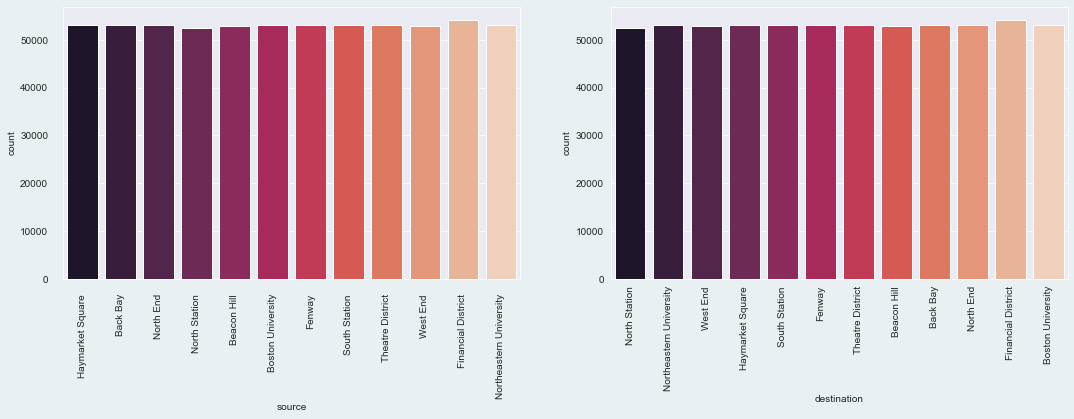

In [264]:
#Counting how many unique variabel in 'hour' column
print("Total unique variabel in hour columns is :", df['source'].nunique())
print("Total unique variabel in day columns is :", df['destination'].nunique())

#Counting the distribution of value in 'hour' column
fig, ax = plt.subplots(1,2, figsize=(18, 5))
sns.countplot(data=df, x='source', ax=ax[0], palette='rocket')
sns.countplot(data=df, x='destination', ax=ax[1], palette='rocket')
fig.patch.set_facecolor((0.91, 0.94, 0.949))

#Configuring and rotating the ax[0] label
ax[0].set_xticklabels(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
       'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
       'Theatre District', 'West End', 'Financial District',
       'Northeastern University'], rotation=90)

#Configuring and rotating the ax[1] label
ax[1].set_xticklabels(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], rotation=90)

ax[0].tick_params(axis="both", direction="in", pad=15)

**4.3 Analysing total value in source and destination**
- There are 12 unique values in both source and destinaton column.
- All of them almost have the same amount of data.

<AxesSubplot:>

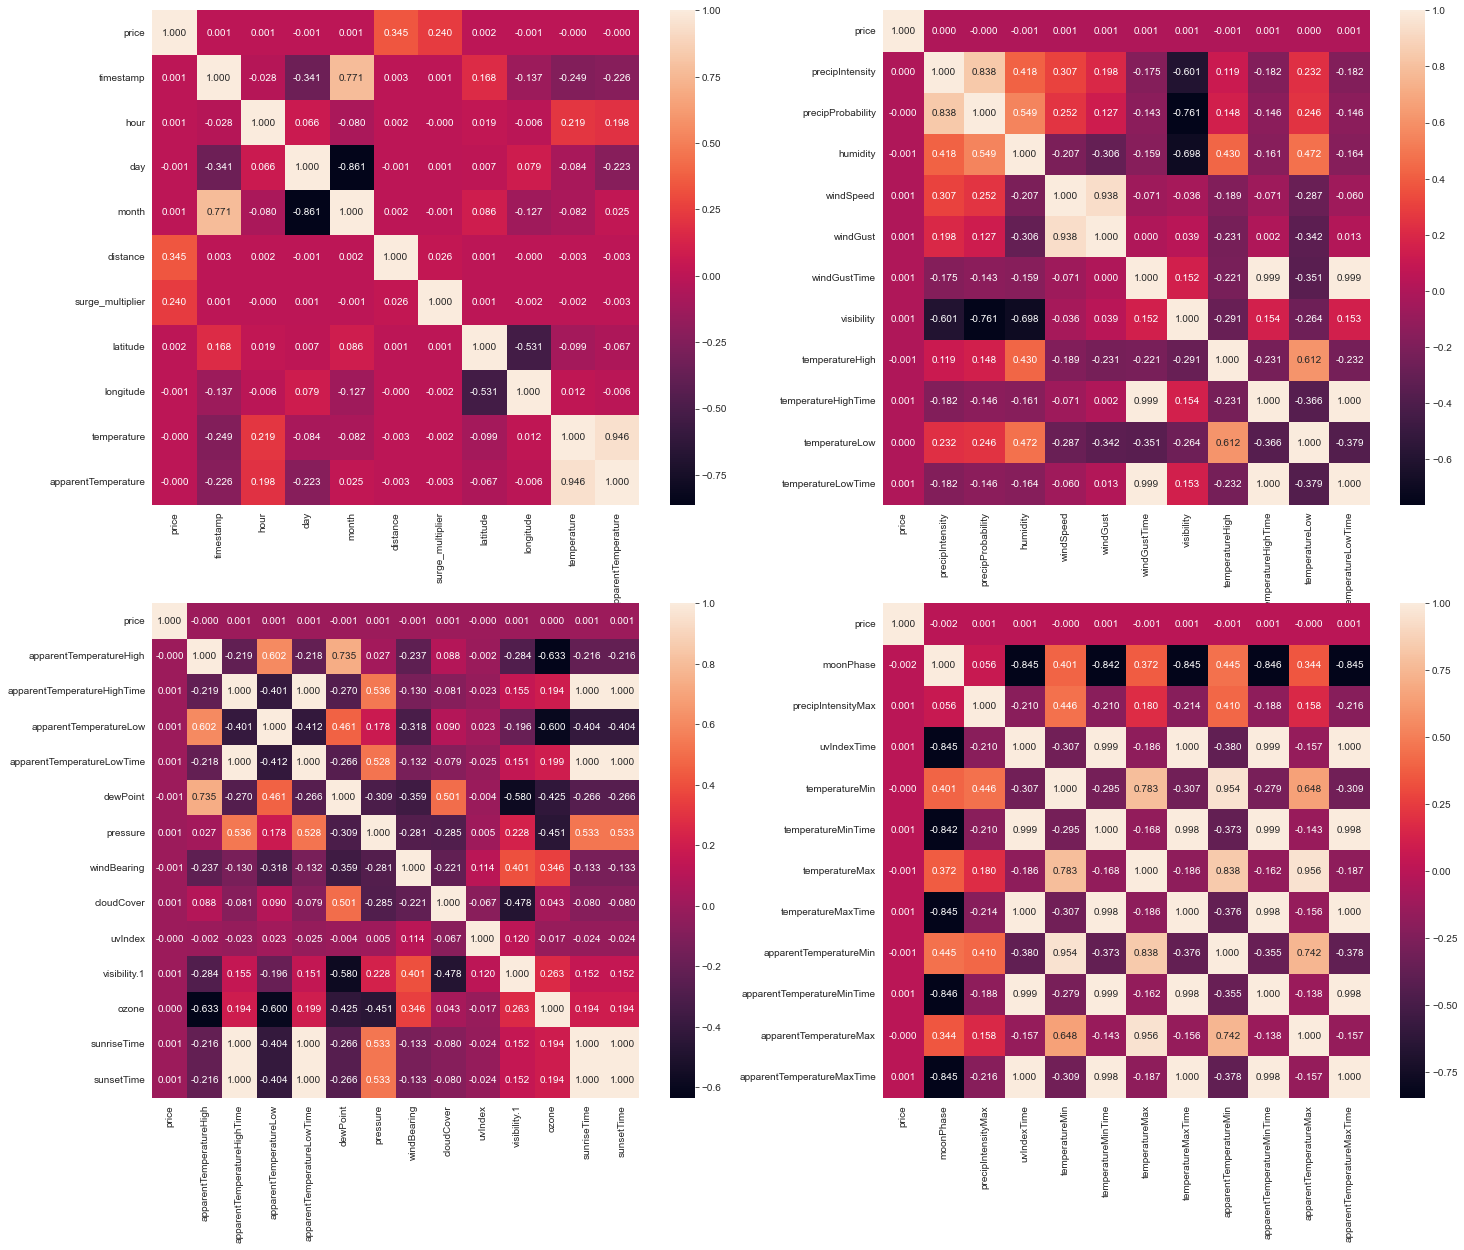

In [265]:
#Grouping column for easy visualization
first_group_column = df[['price', 'id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone','source', 'destination', 
    'cab_type', 'product_id', 'name', 'distance', 'surge_multiplier','latitude', 'longitude', 'temperature','apparentTemperature']]
second_group_column = df[['price','short_summary', 'long_summary','precipIntensity', 'precipProbability', 
    'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh','temperatureHighTime', 'temperatureLow', 'temperatureLowTime']]
third_group_column = df[['price', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime']]
fourth_group_column = df[['price', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime']]


# Heatmap Correlation Matrix
fig, ax = plt.subplots(2, 2, figsize=(24, 20))
sns.heatmap(first_group_column.corr(), annot=True, fmt='.3f', ax=ax[0,0])
sns.heatmap(second_group_column.corr(), annot=True, fmt='.3f', ax=ax[0,1])
sns.heatmap(third_group_column.corr(), annot=True, fmt='.3f', ax=ax[1,0])
sns.heatmap(fourth_group_column.corr(), annot=True, fmt='.3f', ax=ax[1,1])

**4.4 Analysing correlation between target and features**
- Here, I'm using heatmap correlation matrix to show correlation between target (price) and the rest of features.
- However, since there are 57 total columns in this dataset, I separated them to 4 matrices so we can easily comprehend all of the contents shown.
- Also, I only take three decimal in the coefficient of correlation matrices.

From the matrix we can understand that :
- With 3 decimal setting, only distance and surge_multiplier show significant indication of correlation.
- The category columns are not shown in the matrix since we have to encode them in the first place. We'll do this in the next step (4.5).
- Some of the columns will be dropped in the feature engineering & selection step, since they don't have strong correlation with target.



<AxesSubplot:>

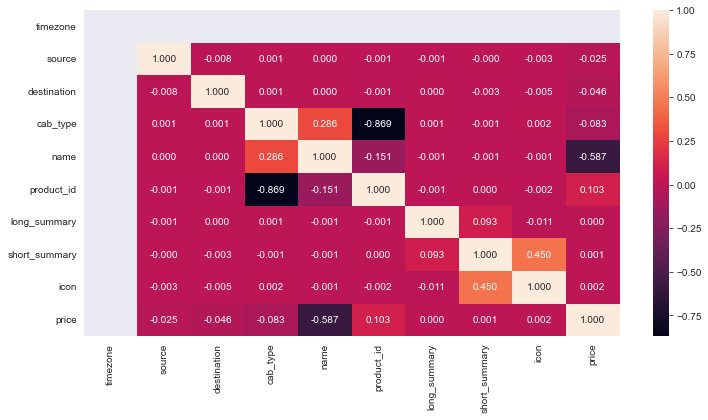

In [266]:
#Assign label encoder to variable
label_en = preprocessing.LabelEncoder()

#Select all the category columns
df_cat_column = df[['timezone', 'source', 'destination', 'cab_type', 'name', 'product_id', 'long_summary', 'short_summary', 'icon','price']]

#Encode the category columns
df_cat_encode = df_cat_column.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=label_en.fit_transform(df_cat_encode[col])
    
#Showing plot
plt.figure(figsize=(12,6))
sns.heatmap(df_cat_encode.corr(), fmt='.3f', annot=True)

**4.5 Analysing correlation between target and category columns**
- After encoded the category columns we do the same like we did in the step 4.4, plotting them into heatmap.
- Column 'name' is the only feature that shows strong correlation (above +/-0.5) related to the target.
- Some of these columns may be dropped in the feature engineering & selection step since some of them are not have strong impact and correlation to the target.

<AxesSubplot:xlabel='price', ylabel='hour'>

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


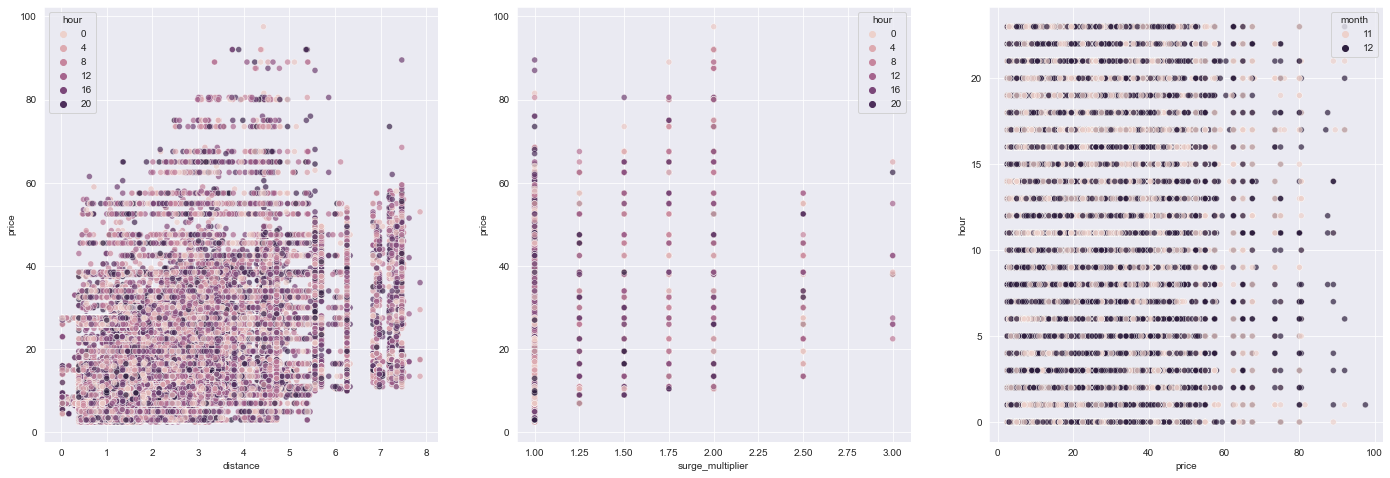

In [267]:
#Plotting some features(distance, surge_multiplier, price with the target and other features)
fig, ax = plt.subplots(1, 3, figsize=(24, 8))
sns.scatterplot(data=df, x='distance', y='price', hue='hour', ax=ax[0], alpha=0.7)
sns.scatterplot(data=df, x='surge_multiplier', y='price', hue='hour', ax=ax[1], alpha=0.7)
sns.scatterplot(data=df, x='price', y='hour', hue='month', ax=ax[2], alpha=0.7)

**4.6 Analysing further corrlation between target and distance, surge_multiplier and hour**
- In the left figure we can understand that the price will get higher if the distance get farther.
- So does with surge_multiplier, so we can use both features to predict the linear regression as 2nd figure (middle) tell us.
- It seems month and hour have correlation eventhough it's not too strong with the target as shown in third figure (right), so we can include these features as well.

<AxesSubplot:xlabel='price', ylabel='destination'>

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


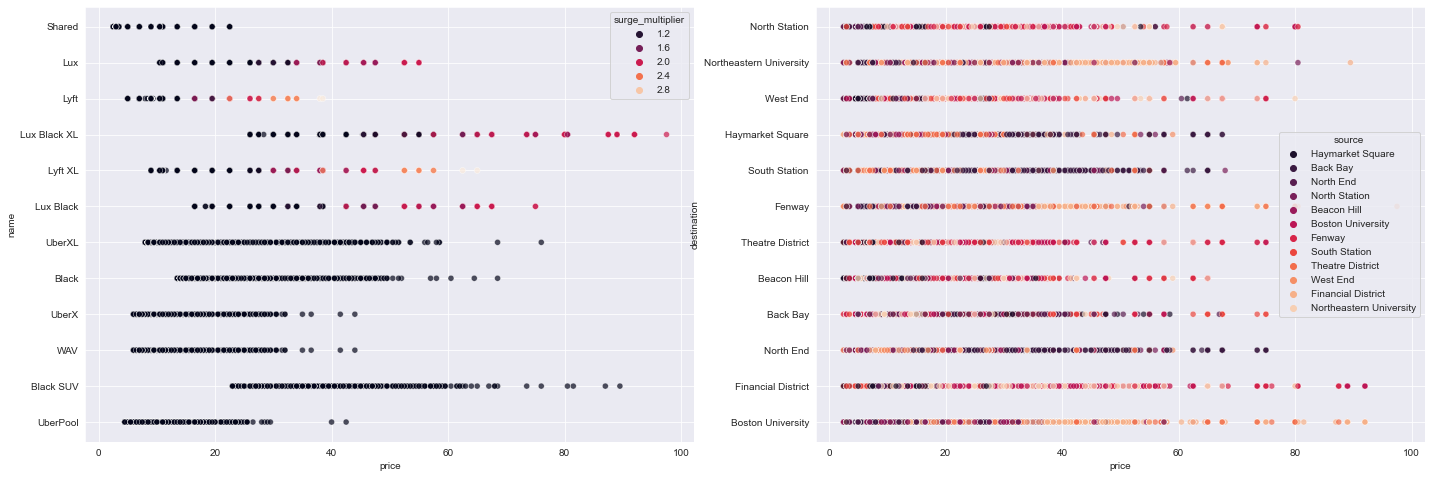

In [268]:
#Plotting the price with some features to see correlation among them
fig, ax=plt.subplots(1, 2, figsize=(24, 8))
sns.scatterplot(data=df, x='price', y='name', hue='surge_multiplier', ax=ax[0], palette='rocket', alpha=0.7)
sns.scatterplot(data=df, x='price', y='destination', hue='source', ax=ax[1], palette='rocket', alpha=0.7)

**4.7 Correlation between name, source, destination and price**
- Column name shows hat it has correlation with price (lef picture).
- Black SUV and Lux Black XL indicate that they have relatively higher price than others
- From the right figure we also can comprehend that source and destination may have correlation with price, eventhough not too strong.

# 5. Featuring Engineer & Selection

In [269]:
#Importing the train_test_split to split our data
from sklearn.model_selection import train_test_split

#Assiign X and y
X = df.drop(columns='price')
y = df['price']

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=76)

**5.1 Splitting the Data**
- Here we split the data from X and Y as well as from train and test data.

Kurtosis from price is  1.2235269612288744
Skewnes from price is  1.0450184740246062
Columns y is right skewed


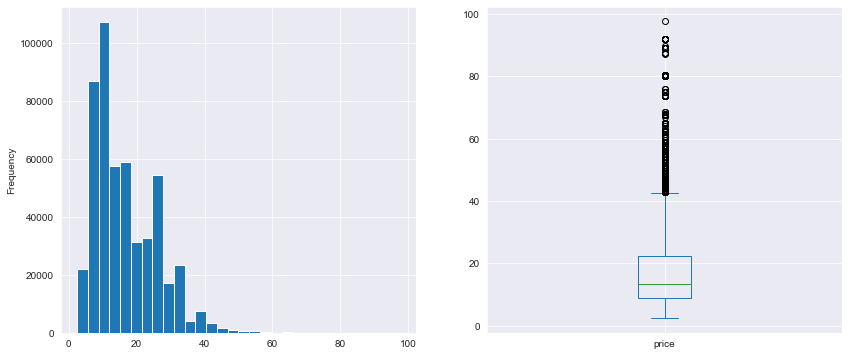

In [270]:
#Plotting the y_train to see data distibution and outliers
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
y_train.plot(kind='hist', ax=ax[0], bins=30)
y_train.plot(kind='box', ax=ax[1])

#Calculate the kurtotsis and skewness coefficient
print('Kurtosis from price is ', y_train.kurt())
print('Skewnes from price is ', y_train.skew())

if -0.5 <= y_train.skew() <= 0.5:
    print("Columns y is normal distribution")
elif y_train.skew() > 0.5:
    print("Columns y is right skewed")
elif y_train.skew() < -0.5:
    print("Columns y is left skewed")

**5.2 Analysing outliers and data distribution from target**
- From plot shown above we can understand that the price column is right skew and there are some outliers as well.
- We'll use Tuckey's formula for handle the outliers.

In [271]:
#Counting Quartiles 
quartiles = np.percentile(y_train, [25, 50, 75])

#Counting bottom and upper outliers
iqr = quartiles[2] - quartiles[0]
upper_outliers = quartiles[2] + 1.5 * iqr
bottom_outliers = quartiles[0] - 1.5 * iqr

#Removing ourliers from our dataset
y_train_clean = y_train[(y_train > bottom_outliers) & (y_train < upper_outliers)]

**5.3 Cleaning data target from outliers**
- Here we clean data from outliers from y_train.

Kurtosis from price is  -0.3225079555288395
Skewnes from price is  0.7636575390669885
Columns y is right skewed


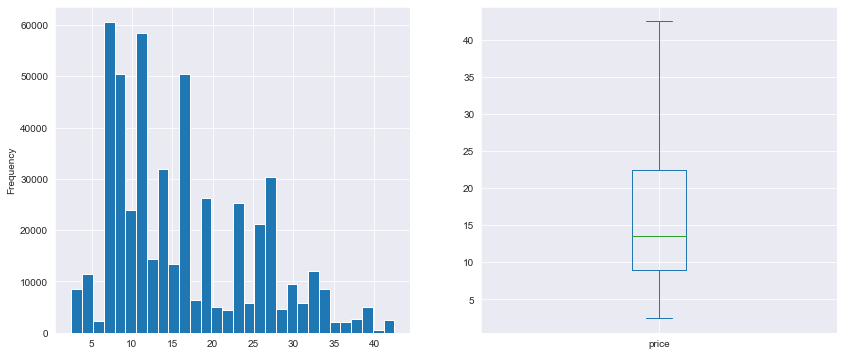

In [272]:
#Plotting once again to see data distribution and outliers after cleaning
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
y_train_clean.plot(kind='hist', ax=ax[0], bins=30)
y_train_clean.plot(kind='box', ax=ax[1])

#Calculating the kurtosis and skewness coefficient
print('Kurtosis from price is ', y_train_clean.kurt())
print('Skewnes from price is ', y_train_clean.skew())

if -0.5 <= y_train_clean.skew() <= 0.5:
    print("Columns y is normal distribution")
elif y_train_clean.skew() > 0.5:
    print("Columns y is right skewed")
elif y_train_clean.skew() < -0.5:
    print("Columns y is left skewed")

**5.4 Plotting once again the target data**
- Here, the data is clean from outliers.
- The data distribution is still skew if we see the skewness coefficient, but it's just 0.2 higher than normal one (normal coefficient is -0.5 until 0.5). So we can proceed as it is.

In [273]:
y_train_clean.shape

(505943,)

**5.5 New shape target**
- After we delete outliers, it becomes 505864 rows in y_train.

In [274]:
#Summing total outliers
total_outliers = y_train[(y_train < bottom_outliers) | (y_train > upper_outliers)]

#Removing x_train from outliers
X_train_clean = X_train.drop(index=total_outliers.index, axis=0)

#Calculation the amount and percentage of outliers
print('Total outliers is', len(total_outliers), 'from', len(y_train))
print('Which is only', len(total_outliers)/len(y_train)*100, '%.')

Total outliers is 4437 from 510380
Which is only 0.8693522473451154 %.


**5.6 Adjust the X_train**
- We also delete the outliers features from X_train data based on outliers index from y_train.
- Now, it becomes 505864 rows, the same with y_train.

In [275]:
#Dropping uncessary columns
X_train_clean.drop(columns=['id', 'hour', 'day', 'month', 'timestamp', 'datetime', 'timezone', 'product_id','apparentTemperature', 'humidity', 'short_summary', 'long_summary','precipIntensity', 'precipProbability', 'windGustTime', 'temperatureHigh','temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'windSpeed', 'windGust', 'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'visibility', 'pressure'], axis=1, inplace=True)
X_train_clean.head()

,source,destination,cab_type,name,distance,surge_multiplier,latitude,longitude,temperature
309798,Northeastern University,Financial District,Uber,Black,4.55,1.0,42.3503,-71.0810,44.88
563793,North End,Back Bay,Uber,UberXL,2.73,1.0,42.3644,-71.0661,36.89
150481,Northeastern University,North Station,Uber,UberX,3.22,1.0,42.3519,-71.0643,45.32
355566,Haymarket Square,Theatre District,Uber,Black SUV,1.16,1.0,42.2148,-71.0330,43.57
484544,Fenway,West End,Lyft,Lyft XL,2.85,1.0,42.3661,-71.0631,44.34


**5.7 Dropping the columns that previously in 4.4 & 4.5 showing low correlation**
- We drop columns based on 4.5 & 4.5 analysis that related columns don't show any/strong correlations (or even so significant to be considered or influence the target).

In [276]:
#Splitting the number and category columns
X_train_number_columns = X_train_clean[['distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature']]
X_train_category_columns = X_train_clean [['source', 'destination', 'cab_type', 'name']]

**5.8 Splitting the category and number columns**

In [277]:
#Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#fit the scaler
scaler = MinMaxScaler()
scaler.fit(X_train_number_columns)

#transform the x_train number and assign to dataframe
X_train_number = scaler.transform(X_train_number_columns)
df_X_train_number = pd.DataFrame(X_train_number)
df_X_train_number.head()

,0,1,2,3,4
0,0.577806,0.0,0.895572,0.337017,0.677891
1,0.345663,0.0,0.988764,0.542818,0.469329
2,0.408163,0.0,0.906147,0.567680,0.689376
3,0.145408,0.0,0.000000,1.000000,0.643696
4,0.360969,0.0,1.000000,0.584254,0.663795


**5.9 Scale the number columns**
- Here I use MinMaxScaler because the data distribution is a bit skew and may there is outliers still, eventhough not many of them are left.
- Later I assign them to panda dataframe.

In [278]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(X_train_category_columns)

X_train_ohe = ohe.transform(X_train_category_columns).toarray()
df_X_train_ohe = pd.DataFrame(X_train_ohe)
df_X_train_ohe.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**5.10 Encoding the Category Columns**
- Encoding the category column with one hot encoder and make them to be panda dataframe.

In [279]:
X_train_final = pd.concat([df_X_train_number, df_X_train_ohe], axis=1)
X_train_final.head()

,0,1,2,3,4,0,1,2,3,4,...,28,29,30,31,32,33,34,35,36,37
0,0.577806,0.0,0.895572,0.337017,0.677891,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.345663,0.0,0.988764,0.542818,0.469329,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.408163,0.0,0.906147,0.567680,0.689376,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.145408,0.0,0.000000,1.000000,0.643696,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.360969,0.0,1.000000,0.584254,0.663795,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**5.11 The finalizied X_train**
- The above table is the finalized X_train after concatted from encoded category and  scaled number columns.

**PRE PROCESS X_test**

In [280]:
#Dropping uncessary columns
X_test_copy = X_test.copy()
X_test_copy.drop(columns=['id', 'hour', 'day', 'month', 'timestamp', 'datetime', 'timezone', 'product_id','apparentTemperature', 'humidity', 'short_summary', 'long_summary','precipIntensity', 'precipProbability', 'windGustTime', 'temperatureHigh','temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'windSpeed', 'windGust', 'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'visibility', 'pressure'], axis=1, inplace=True)
X_test_copy.head()

,source,destination,cab_type,name,distance,surge_multiplier,latitude,longitude,temperature
271450,Haymarket Square,Financial District,Uber,UberXL,1.00,1.0,42.3661,-71.0631,38.95
22728,Back Bay,North End,Lyft,Lux,2.41,1.0,42.3505,-71.1054,37.62
634916,North End,Back Bay,Lyft,Lux,2.86,1.0,42.2148,-71.0330,52.10
270002,Boston University,Financial District,Lyft,Lyft XL,4.47,1.0,42.3644,-71.0661,36.89
510551,Haymarket Square,Theatre District,Lyft,Lux,1.23,1.0,42.3661,-71.0631,47.95


**5.12 Dropping columns X_test**
- Dropping unnecessary columns from X_test.

In [281]:
#Splitting the number and category columns
X_test_number_columns = X_test_copy[['distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature']]
X_test_category_columns = X_test_copy[['source', 'destination', 'cab_type', 'name']]

**5.13 Splitting the data between category and number columns**

In [282]:
X_test_number_columns = scaler.transform(X_test_number_columns)
df_X_test_number = pd.DataFrame(X_test_number_columns)
df_X_test_number.head()

,0,1,2,3,4
0,0.125000,0.0,1.000000,0.584254,0.523101
1,0.304847,0.0,0.896894,0.000000,0.488384
2,0.362245,0.0,0.000000,1.000000,0.866353
3,0.567602,0.0,0.988764,0.542818,0.469329
4,0.154337,0.0,1.000000,0.584254,0.758027


**5.14 Scale X_test_numner**
- Scaling the number data from X_test with MinMaxScaler and assign to panda dataframe.

In [283]:
X_test_ohe = ohe.transform(X_test_category_columns).toarray()
df_X_test_ohe = pd.DataFrame(X_test_ohe)
df_X_test_ohe.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**5.15 Encode category columns from X_test**
- Encoding the category columns from X_test and assign to panda dataframe.

In [284]:
X_test_final = pd.concat([df_X_test_number, df_X_test_ohe], axis=1)
X_test_final.head()

,0,1,2,3,4,0,1,2,3,4,...,28,29,30,31,32,33,34,35,36,37
0,0.125000,0.0,1.000000,0.584254,0.523101,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.304847,0.0,0.896894,0.000000,0.488384,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.362245,0.0,0.000000,1.000000,0.866353,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.567602,0.0,0.988764,0.542818,0.469329,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.154337,0.0,1.000000,0.584254,0.758027,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**5.11 The finalizied X_test**
- The above table is the finalized X_test after concatted from encoded category and  scaled number columns.

# 6. Model Definition & Training

In [285]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_final, y_train_clean)

LinearRegression()

**6.1 Fitting the model**

In [286]:
lr.coef_

array([ 2.16642364e+01,  2.76266522e+01,  2.25425856e-02,  4.76809305e-03,
        2.27921514e-02, -1.78158516e+12, -1.78158516e+12, -7.97215561e+12,
       -7.97215561e+12, -1.78158516e+12, -7.97215561e+12, -7.97215561e+12,
       -1.78158516e+12, -7.97215561e+12, -7.97215561e+12, -1.78158516e+12,
       -1.78158516e+12,  1.14279229e+13,  1.14279229e+13,  5.23735245e+12,
        5.23735245e+12,  1.14279229e+13,  5.23735245e+12,  5.23735245e+12,
        1.14279229e+13,  5.23735245e+12,  5.23735245e+12,  1.14279229e+13,
        1.14279229e+13, -1.06760171e+12,  1.60795474e+13, -7.97653551e+12,
       -7.97653551e+12,  9.17061362e+12,  9.17061362e+12,  9.17061362e+12,
        9.17061362e+12,  9.17061362e+12,  9.17061362e+12, -7.97653551e+12,
       -7.97653551e+12, -7.97653551e+12, -7.97653551e+12])

**6.2 Looking for the slope for problem 2 later**
- The slope is 2.16642364e+01.

In [287]:
lr.intercept_

-11558779203782.496

**6.3 Looking for the intercept for problem 2 later**
- The intercept is -11558779203782.496.

# 7. Model Evaluation

In [288]:
y_predict_train = lr.predict(X_train_final)
y_predict_test = lr.predict(X_test_final)

**7.1 Predict using the model**
- We predict using the model with X_train and X_test

In [289]:
from sklearn.metrics import mean_absolute_error,r2_score

print('MAE train = ', mean_absolute_error(y_train_clean, y_predict_train))
print('MAE test = ', mean_absolute_error(y_test, y_predict_test))

print('r2score train = ', r2_score(y_train_clean, y_predict_train))
print('r2score test = ', r2_score(y_test, y_predict_test))

MAE train =  1.655367653044661
MAE test =  1.7352589522757553
r2score train =  0.9343392536023915
r2score test =  0.9262259765983871


**7.2 Evaluation with MAE, MSE, RMSE, R2 Score**
- The MAE train and test is just 0.1 different which is our model is good enough. However, 1.6 and 1.7 error are significant since it's the taxy price.
- If we see from R2, it's quite good, since the maximal score is 1, and our score is 0.9
- We will see if we can optimize our model using generalization.

# 8. Model Improvement

**8.A RIDGE REGRESSION**

In [290]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=10.5)
ridge_model.fit(X_train_final, y_train_clean)

ridge_predict_train = ridge_model.predict(X_train_final)
ridge_predict_test = ridge_model.predict(X_test_final)

**8A.1 Ridge model and predict**
- We assign model definition.
- Later we predict using the ridge model regression.

In [291]:
print('MAE train = ', mean_absolute_error(y_train_clean, ridge_predict_train))
print('MAE test = ', mean_absolute_error(y_test, ridge_predict_test))

print('r2score train = ', r2_score(y_train_clean, ridge_predict_train))
print('r2score test = ', r2_score(y_test, ridge_predict_test))

MAE train =  1.6553395521505656
MAE test =  1.7357318190482947
r2score train =  0.9343396831400801
r2score test =  0.9260510160177651


**8A.2 Model Evaluation from Ridge Regression**
- It seems still the same with previous normal regression.
- MAE score are around 1.6 & 1.7, the difference between train and test is only 0.1.
- R2 score also close to 1, which is 0.9

In [292]:
ridge_model2 = Ridge(alpha=4)
ridge_model2.fit(X_train_final, y_train_clean)

ridge2_predict_train = ridge_model2.predict(X_train_final)
ridge2_predict_test = ridge_model2.predict(X_test_final)

**8A.3 Experimenting with hyper-parameter**
- This time I use alpha = 4 to check whether the model is improve.
- We do the usual step as before, fit and predict.

In [293]:
print('MAE train = ', mean_absolute_error(y_train_clean, ridge2_predict_train))
print('MAE test = ', mean_absolute_error(y_test, ridge2_predict_test))

print('r2score train = ', r2_score(y_train_clean, ridge2_predict_train))
print('r2score test = ', r2_score(y_test, ridge2_predict_test))

MAE train =  1.6554146765294708
MAE test =  1.735450854698344
r2score train =  0.9343420992750009
r2score test =  0.9261661503437166


**8A.4 Model Evaluation from experimented hyper-parameter of Ridge Regression**
- It seems still the same with previous hyper-paramater alpha = 10.5 regression.
- The MAE and R2 did change slightly, but still the same if we take 2 number decimal.
- We need to try Lasso Regression to check the possibility of improvement.

**8.B LASSO REGRESSION**

In [294]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()

lasso_model.fit(X_train_final, y_train_clean)
lasso_predict_train = lasso_model.predict(X_train_final)
lasso_predict_test = lasso_model.predict(X_test_final)

**8B.1 Lasso model and predict**
- We assign model definition.
- Later we predict using the lasso model regression.

In [295]:
print('MAE train = ', mean_absolute_error(y_train_clean, lasso_predict_train))
print('MAE test = ', mean_absolute_error(y_test, lasso_predict_test))

print('r2score train = ', r2_score(y_train_clean, lasso_predict_train))
print('r2score test = ', r2_score(y_test, lasso_predict_test))

MAE train =  6.919140431990074
MAE test =  7.1482751267113525
r2score train =  0.11056330160676164
r2score test =  0.10527357672408821


**8B.2 Model Evaluation from Lasso Regression**
- It seems the Lasso model is worse from two previous model based on MAE & R2 score.
- Lasso model is not good for our dataset.

**8.C POLYNOMIAL REGRESSION**

In [296]:
#from sklearn.preprocessing import PolynomialFeatures

#polynomial_converter = PolynomialFeatures(degree=4)
#poly_features = polynomial_converter.fit_transform(X_train_final)
#poly_feature_test = polynomial_converter.transform(X_test_final)

**8C.1 Kernel Crashes**
- I tried several time the code above to use Polynomial model, but the kernel always crashes, so I decide to cancel the model. There is error as below : 
- Canceled future for execute_request message before replies were done
The Kernel crashed while executing code in the the current cell or a previous cell. Please review the code in the cell(s) to identify a possible cause of the failure. Click here for more info. View Jupyter log for further details.
https://github.com/microsoft/vscode-jupyter/wiki/Kernel-crashes

# 9. Model Inference

In [297]:
#Dropping uncessary columns
data_inf_copy = data_inf.copy()
data_inf_copy.drop(columns=['id', 'hour', 'day', 'price', 'month', 'timestamp', 'datetime', 'timezone', 'product_id','apparentTemperature', 'humidity', 'short_summary', 'long_summary','precipIntensity', 'precipProbability', 'windGustTime', 'temperatureHigh','temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'windSpeed', 'windGust', 'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'visibility', 'pressure'], axis=1, inplace=True)
data_inf_copy.head()

,source,destination,cab_type,name,distance,surge_multiplier,latitude,longitude,temperature
254160,Beacon Hill,Haymarket Square,Lyft,Lux,1.35,1.0,42.3519,-71.0551,41.97


In [298]:
y_data_inf = data_inf['price']
y_data_inf

254160    13.5
Name: price, dtype: float64

**9.1 Dropping unnecessary columns from data inference**

In [299]:
#Splitting the number and category columns
data_inf_number_columns = data_inf_copy[['distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature']]
data_inf_category_columns = data_inf_copy[['source', 'destination', 'cab_type', 'name']]

**9.2 Splitting the data between category and number columns**

In [300]:
data_inf_number = scaler.transform(data_inf_number_columns)
df_data_inf_number = pd.DataFrame(data_inf_number)
df_data_inf_number

,0,1,2,3,4
0,0.169643,0.0,0.906147,0.694751,0.601932


**9.3 Scaling the number columns of data inference**

In [301]:
data_inf_ohe = ohe.transform(data_inf_category_columns).toarray()
df_data_inf_ohe = pd.DataFrame(data_inf_ohe)
df_data_inf_ohe

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**9.4 Encoding the category columns of data inference with One-Hot Encoder**

In [302]:
data_inf_final = pd.concat([df_data_inf_number, df_data_inf_ohe], axis=1)
data_inf_final

,0,1,2,3,4,0,1,2,3,4,...,28,29,30,31,32,33,34,35,36,37
0,0.169643,0.0,0.906147,0.694751,0.601932,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**9.5 Concat the scaled number and encoded columns of data inference**

In [303]:
y_predict_data_inf = lr.predict(data_inf_final)
y_predict_data_inf

array([14.671875])

**9.6 Predict the price from data inference**
- The predicted price is 14.67 and the actual price from data inference is 13.5.
- It's like what our model evaluation says that the margin error is 1.65 from data train or 1.73 from data test.

# 10. Overall Conclusion
- Predict using Linear Regression can be done with MAE 1.67 - 1.73 to predict the price.
- If we using generalization method as Ridge, it doesn't affect much.
- Lasso Regression is worse than 2 previous model.

# CONCEPTUAL PROBLEMS

1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !
- Linear Regression describes relationship between variables/features by fitting a line to the observed data. The line will be drawn by calculation the residual distance between the line and the actual value of the explanatory variable/features with the least square or mean absolute error.

2. Tunjukkan dan tafsirkan arti dari coefficient dan slope yang didapat dari model yang telah Anda bangun !

- Intercept : Intercept indicates the location where it intersects an axis. In this case, the intercept from our model is -11558779203782.496, which mean the price will be -11558779203782.496 when the x/features = 1, when we using the ride from Lyft / Uber service. However, it's imposible since it means the price we have to pay. The default price will be more than zero, and can't be negative.

- Slope : The slope indicates the steepness of the price. In this case, the slope can be used to estimate a rate of change in our target which is price column. The greater the magnitude of the slope, the steeper the line and the greater the rate of change. So, our model using this slope to predict the price. The price will change based on below slope, from one features to another. Example, in first index has slope 2.16642364e+01. The price will be predicted with calculation from this slope.

In [305]:
#Slope amount
lr.coef_

array([ 2.16642364e+01,  2.76266522e+01,  2.25425856e-02,  4.76809305e-03,
        2.27921514e-02, -1.78158516e+12, -1.78158516e+12, -7.97215561e+12,
       -7.97215561e+12, -1.78158516e+12, -7.97215561e+12, -7.97215561e+12,
       -1.78158516e+12, -7.97215561e+12, -7.97215561e+12, -1.78158516e+12,
       -1.78158516e+12,  1.14279229e+13,  1.14279229e+13,  5.23735245e+12,
        5.23735245e+12,  1.14279229e+13,  5.23735245e+12,  5.23735245e+12,
        1.14279229e+13,  5.23735245e+12,  5.23735245e+12,  1.14279229e+13,
        1.14279229e+13, -1.06760171e+12,  1.60795474e+13, -7.97653551e+12,
       -7.97653551e+12,  9.17061362e+12,  9.17061362e+12,  9.17061362e+12,
        9.17061362e+12,  9.17061362e+12,  9.17061362e+12, -7.97653551e+12,
       -7.97653551e+12, -7.97653551e+12, -7.97653551e+12])